# Fall 2022 Final Project

## Question 2

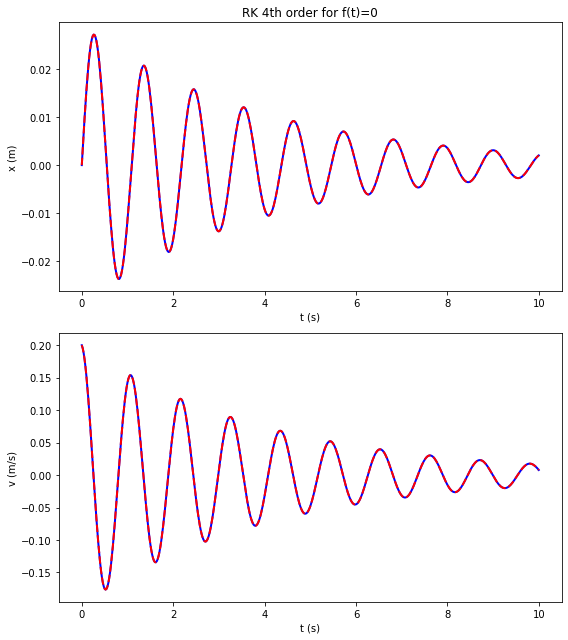

In [42]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 0
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*gamma*v-k*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d
    
def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for f(t)=0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

## Question 3

### Overdamped

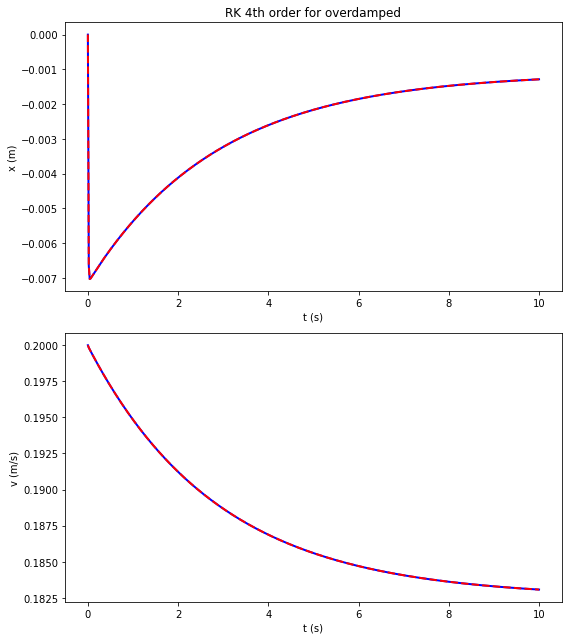

In [55]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 0
f_x = lambda t,x,v:  -(lambda_I / (lambda_I - lambda_II) * exp(lambda_I * t)) + (-lambda_II / (lambda_II - lambda_I) * exp(lambda_II * t))
                    #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: -1 / (lambda_I - lambda_II) * exp(lambda_I * t) + 1 / (lambda_II - lambda_I) * exp(lambda_II * t)
                    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                    # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
zeta_od = 10
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d
    
def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for overdamped")
#plt.text(1 + tf, -0.02,f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
#plt.text(1 + tf, -0.02,f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### Critically damped

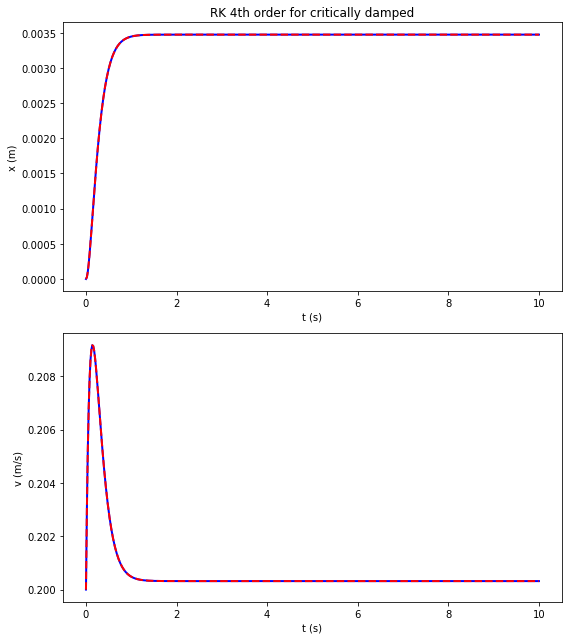

In [69]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 0
f_x = lambda t,x,v: -CI_cd * exp(-omega_n * t) + CII_cd * t * exp(-omega_n * t)
                    #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: exp(-omega_n * t) * (-omega_n * CI_cd + CII_cd * (1 - omega_n * t))
                    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                    # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
zeta_od = 10
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x_iv
B = v_iv
CI_cd = A
CII_cd = B + omega_n * A
    
def xcd_of_t (CI, CII, omega_n, t):
    return CI * exp(-omega_n * t) + CII * t * exp(-omega_n * t)

def vcd_of_t (CI, CII, omega_n, t):
    return exp(-omega_n * t) * (-omega_n * CI + CII * (1 - omega_n * t))

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_cd = [xcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in x_TS]
v_cd = [vcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for critically damped")
#plt.text(1 + tf, -0.02,f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
#plt.text(1 + tf, -0.02,f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### Under damped

Omega_n =  6.928203230275509
zeta_ud =  0.05051814855409226
omega_d =  6.919356906534016


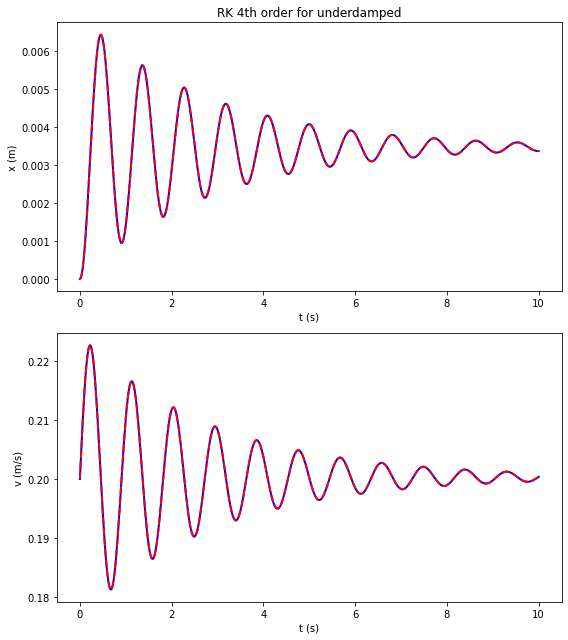

In [68]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 0
f_x = lambda t,x,v: exp(-zeta_ud * omega_n * t) * (-DI * cos(omega_d * t) + DII * sin(omega_d * t))
f_v = lambda t,x,v: exp(-zeta_ud * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta_ud * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta_ud * omega_n * sin(omega_d * t)))

def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
zeta_od = 10
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
lambda_I = -omega_n * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_n * (zeta_od + sqrt(zeta_od ** 2 - 1))
print("Omega_n = ", omega_n)
print("zeta_ud = ", zeta_ud)
print("omega_d = ", omega_d)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d
    
def xcd_of_t (CI, CII, omega_n, t):
    return CI * exp(-omega_n * t) + CII * t * exp(-omega_n * t)

def vcd_of_t (CI, CII, omega_n, t):
    return exp(-omega_n * t) * (-omega_n * CI + CII * (1 - omega_n * t))

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for underdamped")
#plt.text(1 + tf, -0.02,f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
#plt.text(1 + tf, -0.02,f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

## Question 4

### W/ m = 5*sin(2*pi*sqrt(k)*t)

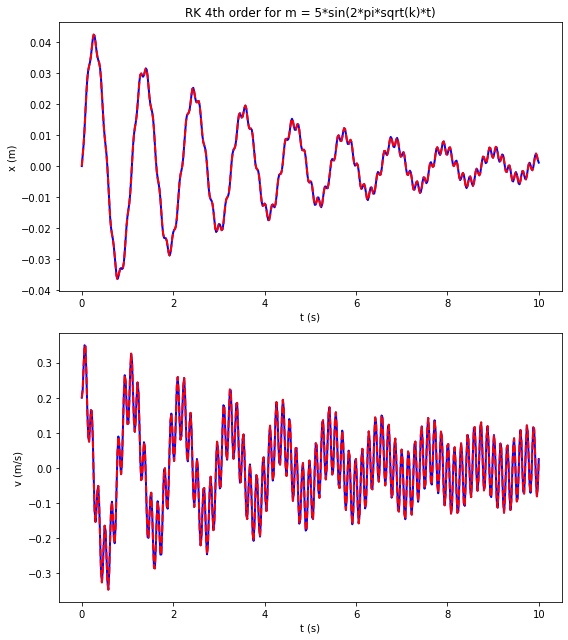

In [88]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 5*sin(2*pi*sqrt(k)*t)
f_x = lambda t,x,v: v
f_v = lambda t,x,v: F_over_m(t)-2*gamma*v-k*x
                                              
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d
    
def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for m = 5*sin(2*pi*sqrt(k)*t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### W/ m = sin(t)

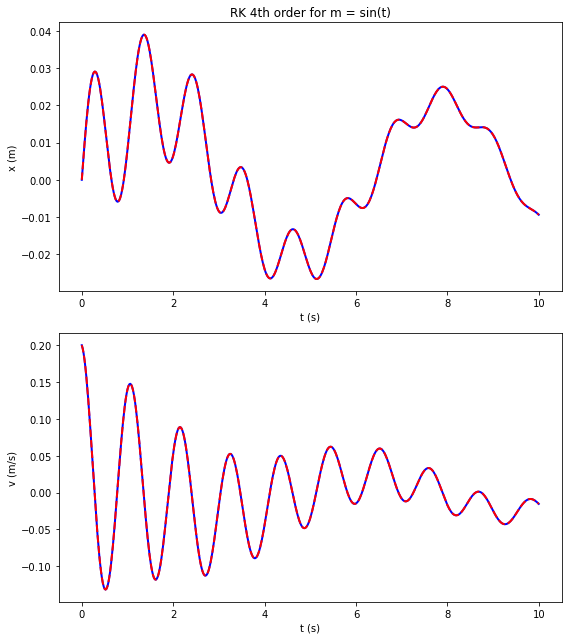

In [98]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: sin(t)
f_x = lambda t,x,v: v
f_v = lambda t,x,v: F_over_m(t)-2*gamma*v-k*x
                                              
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d
    
def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for m = sin(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### W/ m = t^2

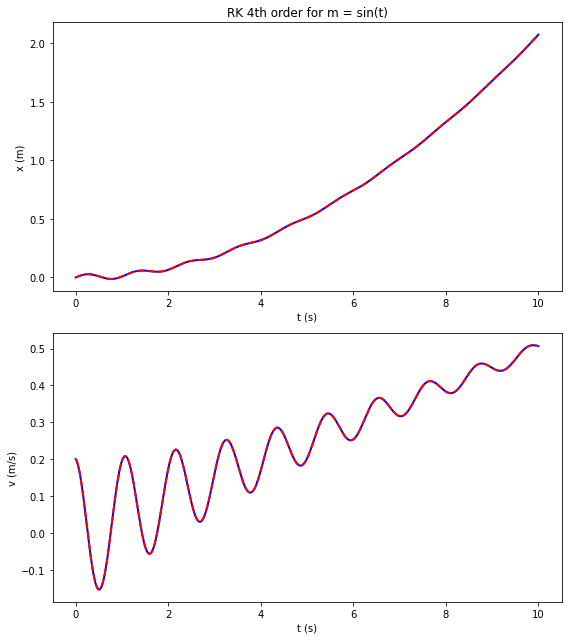

In [97]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7 #1/s
k = 48. #N/m/kg
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: t*t
f_x = lambda t,x,v: v
f_v = lambda t,x,v: F_over_m(t)-2*gamma*v-k*x
                                              
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d
    
def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for m = sin(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

## Question 5

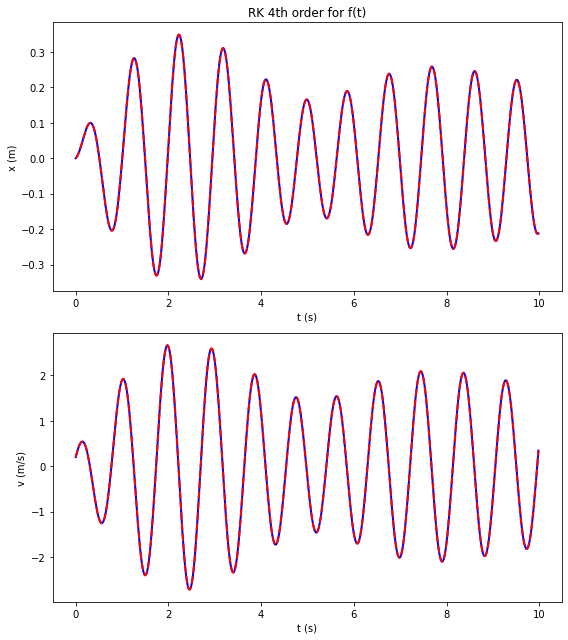

In [96]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

gamma = .7
k = 48.
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.
m = 1

F_over_m = lambda t: 5*cos(omega_n*t)
f_x = lambda t,x,v: v                 
f_v = lambda t,x,v: F_over_m(t)-2*gamma*v-k*x  
                                         
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1

m =1 
ti = 0.0    #initial value for t
tf = 10.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
x_TS = np.linspace(ti, tf)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv
omega_n = sqrt(k / m)
zeta_ud = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta_ud ** 2)
A = x_iv
B = v_iv
DI = A
DII = (B + A * zeta_ud * omega_n) / omega_d
    
def xud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vud_of_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1,n):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1],dt)

x_ud = [xud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]
v_ud = [vud_of_t(DI, DII, zeta_ud, omega_n, omega_d, tval) for tval in x_TS]



fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("RK 4th order for f(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()